In [6]:
from sympy import *

## Defining symbols, rational numbers, matrices & vectors

In [7]:
t = Symbol('t', real=True) # assume that t takes only real values
mu = Symbol('mu', positive=True) # assume that mu takes only positive values
# you may create several symbols at once
l1, l2, lam = symbols('l1 l2 lam') # no assumptions
tau, s = symbols('tau s', nonnegative=True) # assume that tau and s take only nonnegative values

t0 = Rational(0) # symbolic zero
t1 = log(Rational(2)) # symbolic log(2)
print('t1={}'.format(t1)) 
frac12 = Rational(1, 2) # symbolic representation of 1/2

A = Matrix([[0, 1, 0],[-1, 0, 1], [0, 0, 0]]) # symbolic matrix 3x3
B = Matrix([[0], [0], [1]]) # symbolic column vector 3x1
E = eye(3) # idenity matrix 3x3, please do not denote this by I to make I denote complex i
print('A:')
print() # just empty line
pprint(A) # print matrix

x0 = Matrix([[0], [0]]) # symbolic column vector 2x1
x1 = Matrix([[1], [1]]) # symbolic column vector 2x1

print()

l = Matrix([[l1], [l2]]) # matrix elements may be also symbols
print('l:')
print()
pprint(l) # print column vector 2x1

t1=log(2)
A:

⎡0   1  0⎤
⎢        ⎥
⎢-1  0  1⎥
⎢        ⎥
⎣0   0  0⎦

l:

⎡l₁⎤
⎢  ⎥
⎣l₂⎦


## Simple operations on matrices and vectors

In [8]:
G = Matrix([[1, 1, 0],[-1, 1, 0], [1, 1, 1]]).T # transpose matrix to the given one
# another symbolic matrix 3x3 obtained from multiplication of other matrices
Q = G * diag(2,2,1) * G.inv() # diag is for diagonal matrix, inv is for inverse matrix
                              

# building of a matrix from column vectors (by means of concatenation of their transpose row vectors)
R = Matrix([B.T, (A @ B).T, (A**2 @ B).T]).T # ** stands for the power (in contrast to ^ in Matlab)
                                             # @ (along with *) stands for matrix multiplication
print('R = [B|A*B|A^2*B]:')
print()
pprint(R)

print()

# scalar product as a product of row vector on column vector,
# we obtain a matrix and need to take its element
# (indices start in Python from zero in contrast to Matlab, 
# so in fact we get here the element in the position (1,1))
print('Scalar square: {}'.format((l.T * l)[0,0]))
# another way to calculate scalar product is to call dot, we obtain here <l,x1>
print()
print('Scalar product <l,x1>:')
pprint(l.dot(x1))

R = [B|A*B|A^2*B]:

⎡0  0  1⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣1  0  0⎦

Scalar square: l1**2 + l2**2

Scalar product <l,x1>:
l₁ + l₂


## Eigenvalues, eigenvectors, real and imaginary parts of expressions

In [9]:
eig_vals = A.eigenvals()
print('eigenvalues of A together with their algebraic multiplicities:')
pprint(eig_vals) # print this info
print('Alebraic multiplicity of -i for A is {}'.format(eig_vals[-I]))

print()

eig_info = A.eigenvects()
print('Eigenvalues, their algebraic multiplicities and bases of eigenspaces for A:')
print()
print()
pprint(eig_info)

print()

eig_info2 = Q.eigenvects()
print('Eigenvalues, their algebraic multiplicities and bases of eigenspaces for Q:')
print()
print()
pprint(eig_info2)

print('The 3rd eigenvalue of A, its algebraic multiplicity and a basis of its eigenspace:')
print()
print()
pprint(eig_info[2])

print()


print('The basis for the 2nd eigenvalue of Q:')
print()
print()
pprint(eig_info2[1][2])

print()

print('The second vector of the basis for the 2nd eigenvalue of Q:')
print()
print()
pprint(eig_info2[1][2][1])

print()

real_imag_parts=(eig_info[1][2][0]*(cos(t)-I*sin(t))).as_real_imag() # take real and imaginary parts of an expression
print('Real and imaginary parts of an expression:')
print()
print()
pprint(real_imag_parts)

eigenvalues of A together with their algebraic multiplicities:
{0: 1, -ⅈ: 1, ⅈ: 1}
Alebraic multiplicity of -i for A is 1

Eigenvalues, their algebraic multiplicities and bases of eigenspaces for A:


⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡ⅈ⎤⎤⎞  ⎛      ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢0⎥⎥⎟, ⎜-ⅈ, 1, ⎢⎢1⎥⎥⎟, ⎜ⅈ, 1, ⎢⎢1 ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣0 ⎦⎦⎠⎦

Eigenvalues, their algebraic multiplicities and bases of eigenspaces for Q:


⎡⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢1⎥⎥⎟, ⎜2, 2, ⎢⎢0⎥, ⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣0⎦⎦⎠⎦
The 3rd eigenvalue of A, its algebraic multiplicity and a basis of its eigenspace:


⎛      ⎡⎡-ⅈ⎤⎤⎞
⎜      ⎢⎢  ⎥⎥⎟
⎜ⅈ, 1, ⎢⎢1 ⎥⎥⎟
⎜      ⎢⎢  ⎥⎥⎟
⎝      ⎣⎣0 ⎦⎦⎠

The basis for the 2nd eigenvalue of Q:


⎡⎡1⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥, ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣0⎦⎦

The second vector of the basis for the 2nd

## Substitution, simplifying of expressions, differentiation and integration

In [5]:
expA = Matrix([
    [ cos(t), sin(t), -cos(t) + 1],
    [-sin(t), cos(t),      sin(t)],
    [      0,      0,           1]])

# here we check that expA is actually a matrix exponent from A*t
print('d(expA)/dt-A*expA:')
print()
pprint(expA.diff(t) - A @ expA) # should print zero matrix due to the definition of matrix exponent
print()
print('expA(0):')
print()
pprint(simplify(expA.subs(t, 0))) # should print identity matrix due to the definition of matrix exponent

print()
print()

# some quadratic form from l1 and l2 with coefficients being polynomials depending on s
quad_form = s * l1**2 + s**2 * l1 * l2 + 2 * l1**2 + s**3 / 3 * l2**2 - s * l2 *l1  + l2**2
print('Initial quadratic form:')
pprint(quad_form, use_unicode=False)
print('Simplified quadratic form:')
quad_form = collect(quad_form, (l1,l2)) # collect terms by l1 and l2
pprint(quad_form, use_unicode=False)
print('Quadratic form after removal of all brackets:')
quad_form = expand(quad_form) # remove all brackets
pprint(quad_form, use_unicode=False)
print('Simplified quadratic form as a polynomials over s:')
quad_form = collect(quad_form, s) # collect terms by s (i.e. by powers of s)
pprint(quad_form, use_unicode=False)
print('Coefficients of the polyinomial over s obtained by differentiation:')
print('constant term: {},\nbefore s: {},\nbefore s^2: {},\nbefore s^3: {}'.format(
    quad_form.subs(s, 0), quad_form.diff(s).subs(s, 0),
    # possible to point the list of variables with respect to which differentiation is performed
    quad_form.diff(s, s).subs(s, 0) / 2, 
    # possible to point just the order of differentiation
    quad_form.diff(s, 3).subs(s, 0) / 6
))


print()
print()

# integrate an expression over tau from 0 to 3*pi/4
print('Integral:')
print()
pprint(integrate(expA.subs(t,pi/2+tau)*B, (tau, 0, 3*pi/4)))

d(expA)/dt-A*expA:

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

expA(0):

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦


Initial quadratic form:
                                       2  3      
  2         2          2             l2 *s      2
l1 *s + 2*l1  + l1*l2*s  - l1*l2*s + ------ + l2 
                                       3         
Simplified quadratic form:
                                      / 3    \
  2              /    2       \     2 |s     |
l1 *(s + 2) + l1*\l2*s  - l2*s/ + l2 *|-- + 1|
                                      \3     /
Quadratic form after removal of all brackets:
                                       2  3      
  2         2          2             l2 *s      2
l1 *s + 2*l1  + l1*l2*s  - l1*l2*s + ------ + l2 
                                       3         
Simplified quadratic form as a polynomials over s:
                     2  3                        
    2          2   l2 *s      2     /  2        \
2*l1  + l1*l2*s  + ------ + l2 

## Solving of linear and nonlinear equations

In [6]:
x, y = symbols('x y', real=True)
sol = solve([x**2+2*y**2-3, x * y-1]) # find all the intersection points of an ellipse with a hyperbola
print()
pprint(sol) # print all the solutions found

print()

pprint(sol[1]) # print the 2nd solution

print('x of the 3rd solution: {}'.format(sol[2][x]))

print()
print()

# solve equation with respect to a part of variables
L = quad_form + lam*(l1-l2-1)
print('We solve the system of equations that is rows of the following matrix equal to zero:')
print()
pprint(Matrix([[L.diff(l1)], [L.diff(l2)], [L.diff(lam)]]))
print()
sol2 = solve([L.diff(l1), L.diff(l2), L.diff(lam)], (l1, l2, lam))
print('The solution is:')
print()
pprint(sol2, use_unicode=False)
print()
print()
print('The value of lam:')
pprint(sol2[lam], use_unicode=False)


⎡                              ⎧           -√2 ⎫  ⎧          √2⎫⎤
⎢{x: -1, y: -1}, {x: 1, y: 1}, ⎨x: -√2, y: ────⎬, ⎨x: √2, y: ──⎬⎥
⎣                              ⎩            2  ⎭  ⎩          2 ⎭⎦

{x: 1, y: 1}
x of the 3rd solution: -sqrt(2)


We solve the system of equations that is rows of the following matrix equal to zero:

⎡           2                       ⎤
⎢4⋅l₁ + l₂⋅s  + lam + s⋅(2⋅l₁ - l₂) ⎥
⎢                                   ⎥
⎢                     3             ⎥
⎢    2          2⋅l₂⋅s              ⎥
⎢l₁⋅s  - l₁⋅s + ─────── + 2⋅l₂ - lam⎥
⎢                  3                ⎥
⎢                                   ⎥
⎣            l₁ - l₂ - 1            ⎦

The solution is:

        3      2                 /   2           \           2        2       
     2*s  + 3*s  - 3*s + 6      -\3*s  + 3*s + 12/        3*s *(s - 1)  - 4*(s
{l1: ---------------------, l2: -------------------, lam: --------------------
         / 3      2    \             3      2                       /

## Simple plotting

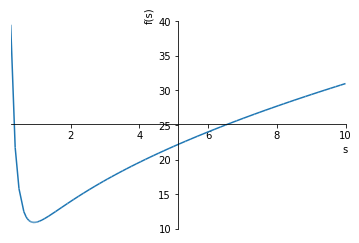

In [7]:
plot(1/sqrt(s**3/(s**4*9.8**2+24)),(s,0.25,10))

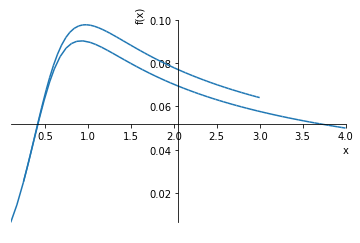

In [8]:
plot((sqrt(s**3/(s**4*10**2+24)),(s,0.1,4)), (sqrt(s**3/(s**4*9**2+24)),(s,0.25,3)))

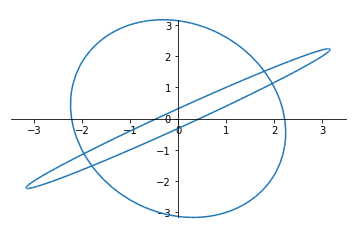

In [9]:
from sympy.plotting import plot_parametric

plot_parametric((2*sin(t)+cos(t),sin(t)-3*cos(t), (t,0,2*pi)),(sin(t)+3*cos(t),sin(t)+2*cos(t), (t,0,2*pi)))

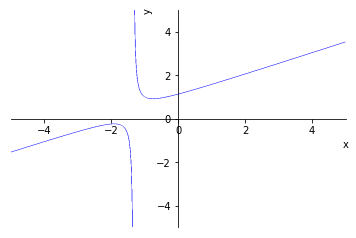

In [10]:
plot_implicit((x+y+1)**2-(y-2*x-3)**2-1)

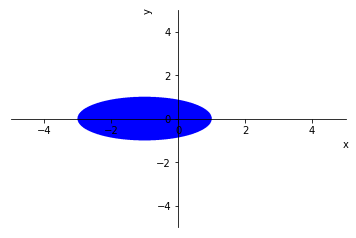

In [11]:
plot_implicit((x+1)**2/4+y**2<=1)